<a href="https://colab.research.google.com/github/joaovvrodrigues/data-analysis/blob/main/emicida_analise_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Análise de dados sobre as letras das músicas do Emicida**

Importando algumas bibliotecas básicas

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

%matplotlib inline
plt.style.use('ggplot')

Importando bibliotecas de processamento de texto

In [ ]:
import nltk    
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize 
from nltk.corpus import stopwords
from string import punctuation
from nltk import FreqDist
import re

nltk.download('averaged_perceptron_tagger')
nltk.download('floresta')
nltk.download('mac_morpho')
nltk.download('machado')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('words')

stopwords = set(stopwords.words('portuguese') + list(punctuation))

Importando biblioteca do Genius

In [ ]:
!pip install lyricsgenius
import lyricsgenius

**Caso já tenha o JSON pode pular os 2 próximos blocos de código**

Pegando as informações de todas músicas do Emicida

In [ ]:
genius = lyricsgenius.Genius("8FxkbaudGXFHuqFM8adKRgnQg3otZEZFS--9QbG4yt1nfx3wWWxFI3WeuHwPKyBN", skip_non_songs=True, excluded_terms=["(Remix)", "(Live)", "(Ao Vivo)", "MC Killer", "(Discurso)", "Inspirada"], remove_section_headers=True,  verbose = True)
artist = genius.search_artist('Emicida',  sort='popularity',  include_features=True )

Salvando informações em JSON

In [48]:
artist.save_lyrics()

Wrote `Lyrics_Emicida.json`


Lendo JSON do artista

In [49]:
with open('Lyrics_Emicida.json') as json_data:
    data = json.load(json_data)

**Função de processamento de texto e montagem de dataSet**

In [233]:
def mountDataSet():
  letras = []
  letras_token = []
  letras_sem_token = []
  nomes = []
  artistas = []
  anos = []
  albuns = []
  quantidadePalavras = []

  for i in range(len(data['songs'])):
    if(data['songs'][i]['lyrics'] != None):
      artistasAtual = []

      letra = data['songs'][i]['lyrics']

      nomes.append(data['songs'][i]['title'])
      for index, item in enumerate(data['songs'][i]['featured_artists']):
            artistasAtual.append(item['name'])

      artistas.append(artistasAtual)

      if(data['songs'][i]['release_date'] != None):
          anos.append(int(data['songs'][i]['release_date'][0:4]))
      else:
          anos.append(0)

      if(data['songs'][i]['album'] != None):
          albuns.append(data['songs'][i]['album']['name'])
      else:
          albuns.append("Single")

      palavras = word_tokenize(letra.lower(), language='portuguese')
      letras_token.append(palavras)
      palavras_sem_stopwords = [palavra for palavra in palavras if palavra not in stopwords and len(palavra) > 3]
      letras_sem_token.append(palavras_sem_stopwords)
      quantidadePalavras.append(len(palavras_sem_stopwords))
      letras.extend(palavras_sem_stopwords)

  return letras, letras_sem_token, nomes, artistas, anos, albuns, quantidadePalavras

**Função de análise de frequência de palavras**

In [107]:
def frequencia(letras, quantidade):
  frequencia = FreqDist(letras)

  mais_frequentes = frequencia.most_common(quantidade)
  mais_frequentes_quantidade = []
  for index, item in enumerate(mais_frequentes):
      mais_frequentes_quantidade.append(mais_frequentes[index][1])

  return mais_frequentes, mais_frequentes_quantidade

**Montando DataSet**

In [234]:
letras, letras_token, nomes, artistas, anos, albuns, quantidadePalavras = mountDataSet()

dataFrame = [nomes, albuns, anos, artistas, quantidadePalavras, letras_token]

df = pd.DataFrame(dataFrame).transpose()
df.columns=['Titulo', 'Album', 'Ano', 'Artistas', 'Quantidade Palavras', 'Letra']

In [235]:
df

Titulo  ...                                              Letra
0                                    Mandume  ...  [letra, mandume, emicida, querem, alguém, onde...
1                           O Céu É o Limite  ...  [letra, limite, rincon, sapiência, rael, emici...
2                             Levanta e Anda  ...  [cômodo, incômodo, sujo, dragão, komodo, úmido...
3                              Boa Esperança  ...  [corra, irmão, guerra, lixar, questão, chorar,...
4                                Passarinhos  ...  [despencados, voos, cansativos, complicados, p...
..                                       ...  ...                                                ...
211                      Prisoner of the Day  ...  [sedated, frontline, wainting, daytime, yeah, ...
212           Os Inimigos Estão Próximos 2.0  ...  [gordão, fura, entra, ação, levo-os, daqui, la...
213                 Hacia el Amor (Acústico)  ...  [bird, snake, horse, bleed, same, colour, sout...
214                           Estrela Brilha  ...  [olhei, estrela, reluzir, chamou, duvidar, ped...
215  O Hip Hop É Foda (freestyle Pocket MTV)  ...  [arrepia, peito, bate, velha, sessão, rima, sa...

[216 rows x 6 columns]

In [248]:
df['Album'].value_counts()

Single                                                                    48
Pra Quem Já Mordeu Um Cachorro Por Comida, Até Que Eu Cheguei Longe...    25
Emicidio                                                                  18
Sobre Crianças, Quadris, Pesadelos e Lições de Casa                       15
O Glorioso Retorno de Quem Nunca Esteve Aqui                              14
AmarElo                                                                   11
Doozicabraba e a Revolução Silenciosa                                     10
Língua Franca                                                              9
Sua Mina Ouve Meu Rep Tamém                                                6
DVD “10 Anos de Triunfo”                                                   5
Drik Barbosa                                                               3
Non Ducor Duco                                                             2
Torcida Brasil                                                             2

**Função retorna gráfico de frequência**

In [236]:
def grafico_freq(mais_frequentes, mais_frequentes_quantidade, ylabel, title):  
  palavras = mais_frequentes
  y_pos = np.arange(len(palavras))
  contagem = mais_frequentes_quantidade
  plt.figure(figsize=(15,10))
  plt.bar(y_pos, contagem, align='center', alpha=0.8)
  plt.xticks(y_pos, palavras, rotation = 90, alpha = 1, fontsize=12)
  plt.yticks(fontsize=12)
  plt.ylabel(ylabel, fontsize=16)
  plt.title(title)
  plt.show()

Análisando as letras e retornando os 20 termos mais utilizados

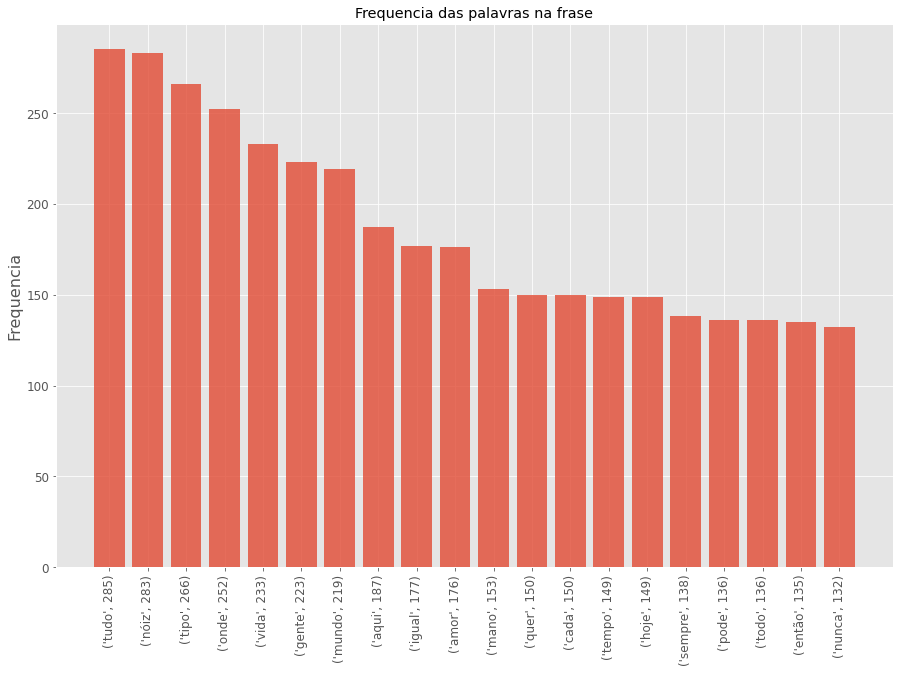

In [237]:
mais_frequentes, mais_frequentes_quantidade = frequencia(letras, 20)

grafico_freq(mais_frequentes, mais_frequentes_quantidade, 'Frequencia', 'Frequencia das palavras na frase')

20 musicas com maior quantidade de palavras

<BarContainer object of 20 artists>

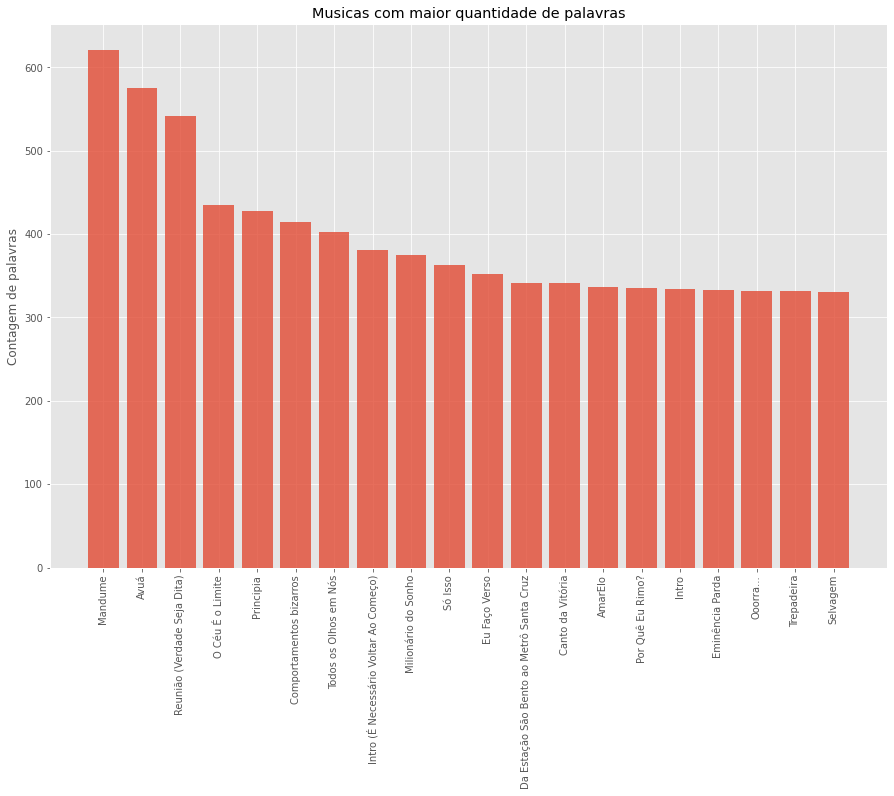

In [238]:
df20 = df.sort_values(by=['Quantidade Palavras'], ascending=False).head(20)

plt.figure(figsize=(15,10))
plt.xticks(rotation = 90, alpha = 1)
plt.ylabel('Contagem de palavras')
plt.title('Musicas com maior quantidade de palavras')
plt.bar(df20['Titulo'], df20['Quantidade Palavras'], align='center', alpha=0.8, )


**WordCloud dos termos mais utilizados**

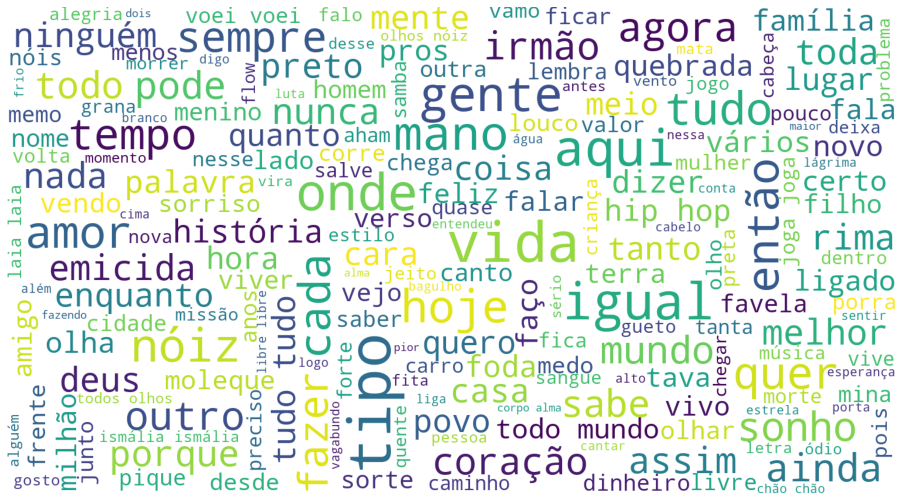

In [239]:
from wordcloud import WordCloud

separator = ' '
palavras = [separator.join(letras)]

wordcloud = WordCloud(max_font_size=100, width = 1520, height = 835, background_color="white").generate(str(palavras)[1:-1])
plt.figure(figsize=(16,9))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

20 artistas que mais tiveram feats com emicida

> Para funcionar deverá marcar include_features=True



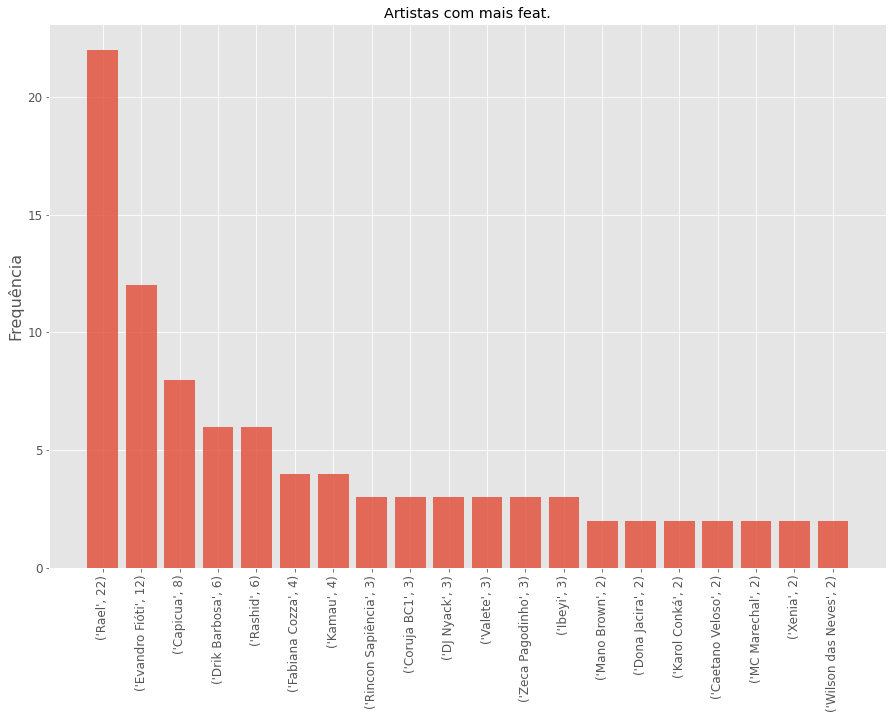

In [240]:
artistas_frequentes = []
for index, item in enumerate(df['Artistas']):
  for i in item:
    artistas_frequentes.append(i)

artistas_frequentes[:] = [x for x in artistas_frequentes if x != 'Emicida']
mais_frequentes, mais_frequentes_quantidade = frequencia(artistas_frequentes, 20)

artistas.clear()
for item in mais_frequentes:
  artistas.append(item[0])

grafico_freq(mais_frequentes, mais_frequentes_quantidade, 'Frequência', 'Artistas com mais feat.')

Quantidade de músicas lançadas por ano

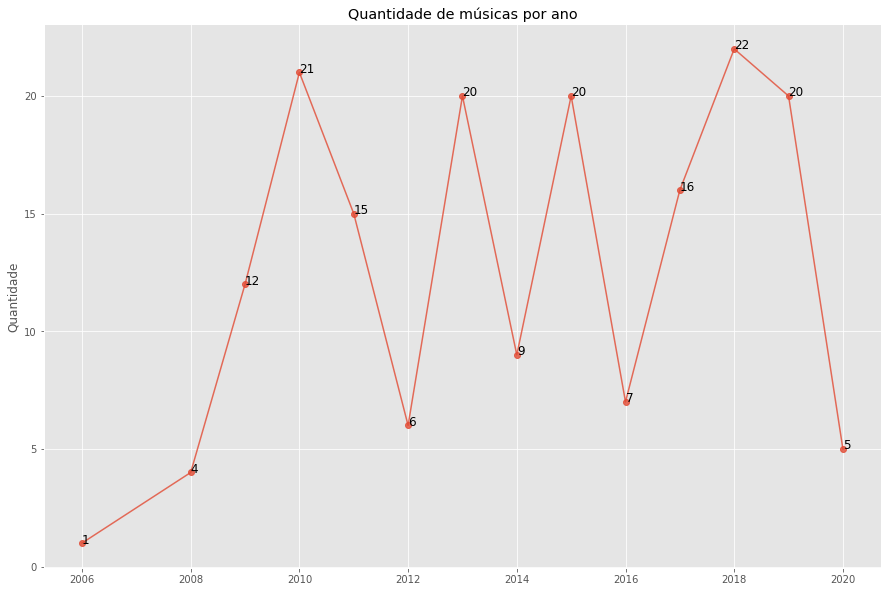

In [241]:
frame_remove = df.loc[df['Ano'] == 0]
frame = df.drop(frame_remove.index)
frame.sort_values(by=['Ano'], ascending=False, inplace=True)

plt.figure(figsize=(15,10))
plt.plot(frame.Ano.value_counts().sort_index(), alpha=0.8, marker = 'o')

for x, y in zip(np.flip(frame['Ano'].unique()), frame.Ano.value_counts().sort_index()):
    plt.text(x, y, str(y), color="black", fontsize=12)

plt.ylabel('Quantidade')
plt.title('Quantidade de músicas por ano')
plt.show()

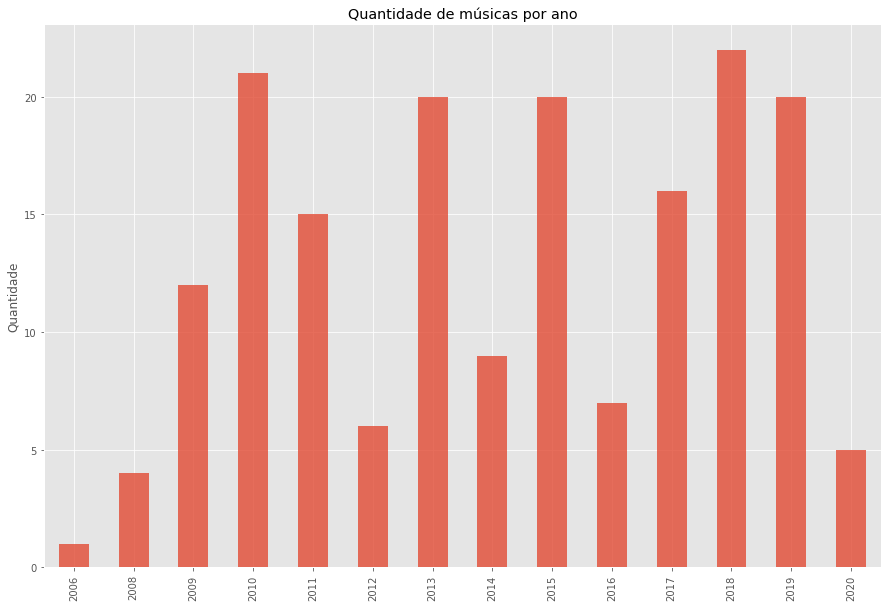

In [249]:
plt.figure(figsize=(15,10))
frame.Ano.value_counts().sort_index().plot(kind='bar', alpha=0.8,)

plt.ylabel('Quantidade')
plt.title('Quantidade de músicas por ano')
plt.show()

Função que irá retornar o WordCloud do Album por index (0 a 7)

In [227]:
albuns_nomes = ['Pra Quem Já Mordeu Um Cachorro Por Comida, Até Que Eu Cheguei Longe...', 'Sua Mina Ouve Meu Rep Tamém', 'Emicidio', 'Doozicabraba e a Revolução Silenciosa', 'O Glorioso Retorno de Quem Nunca Esteve Aqui', 'Sobre Crianças, Quadris, Pesadelos e Lições de Casa', 'Língua Franca', 'AmarElo']

In [229]:
from wordcloud import WordCloud

def wordCloudAlbum(index):
  print(albuns_nomes[index])
  frame = df[df['Album'] == albuns_nomes[index]]
  for letra in frame['Letra']:
    musicas.extend(letra)
  separator = ' '
  palavras = [separator.join(musicas)]

  wordcloud = WordCloud(max_font_size=100, width = 1520, height = 835, background_color="white").generate(str(palavras)[1:-1])
  plt.figure(figsize=(16,9))
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.show()

  musicas.clear()
  palavras.clear()

**Pra Quem Já Mordeu Um Cachorro Por Comida, Até Que Eu Cheguei Longe...**

Pra Quem Já Mordeu Um Cachorro Por Comida, Até Que Eu Cheguei Longe...


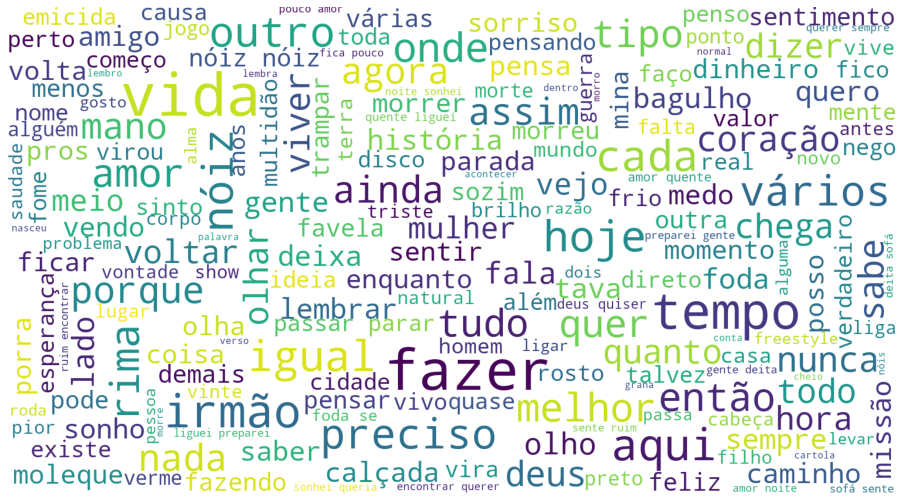

In [230]:
wordCloudAlbum(0)

**Sua Mina Ouve Meu Rep Tamém**


Sua Mina Ouve Meu Rep Tamém


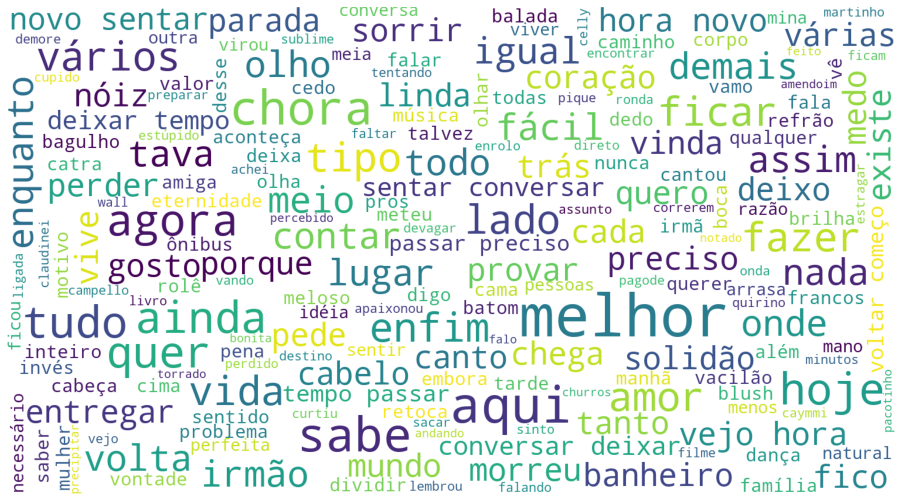

In [231]:
wordCloudAlbum(1)

**Emicidio**

Emicidio


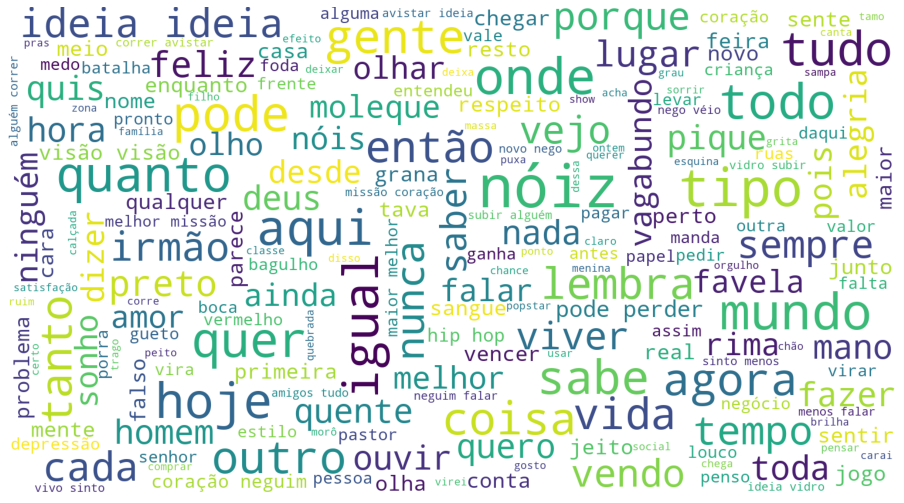

In [232]:
wordCloudAlbum(2)

**Doozicabraba e a Revolução Silenciosa**


Doozicabraba e a Revolução Silenciosa


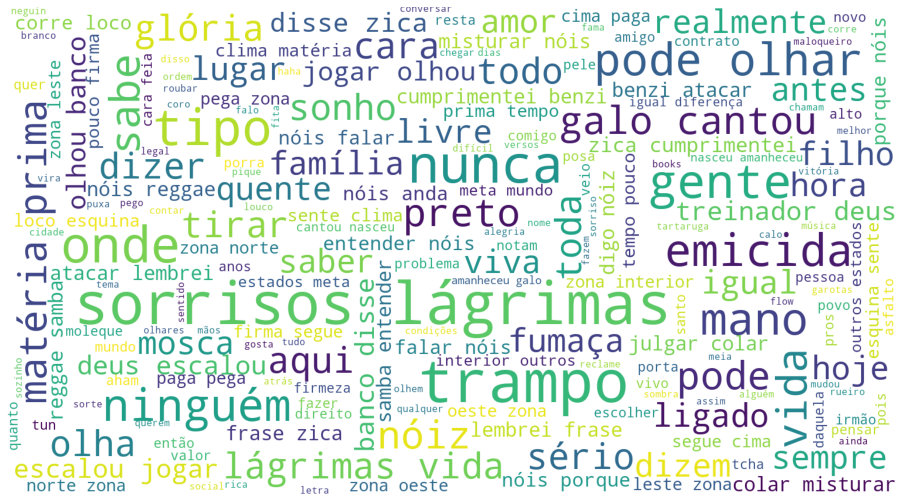

In [243]:
wordCloudAlbum(3)

**O Glorioso Retorno de Quem Nunca Esteve Aqui**


O Glorioso Retorno de Quem Nunca Esteve Aqui


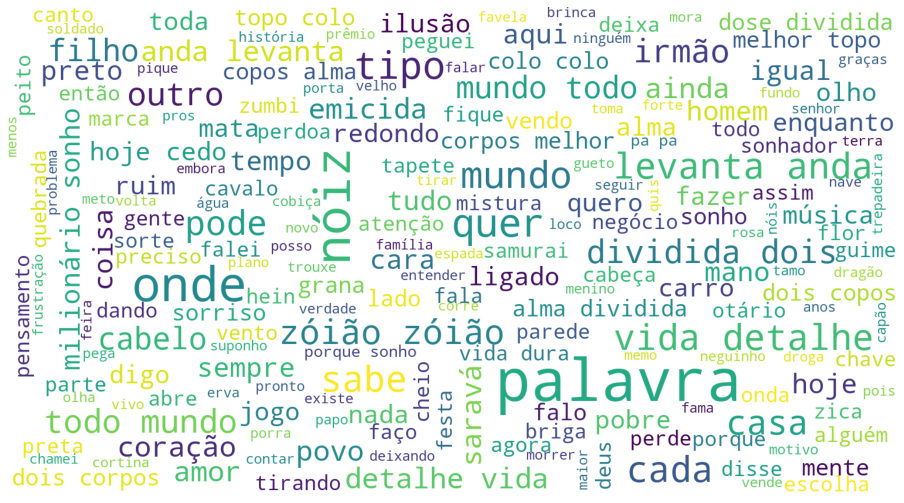

In [244]:
wordCloudAlbum(4)

**Sobre Crianças, Quadris, Pesadelos e Lições de Casa**


Sobre Crianças, Quadris, Pesadelos e Lições de Casa


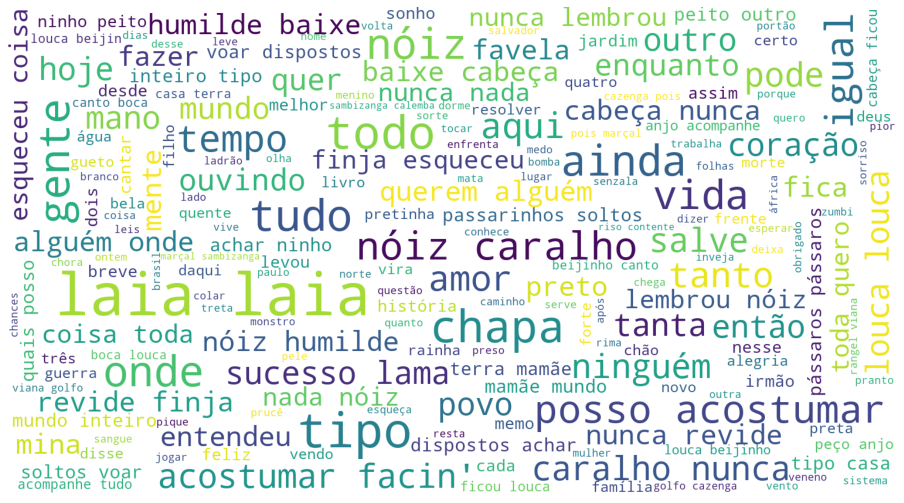

In [245]:
wordCloudAlbum(5)

**Língua Franca**

Língua Franca


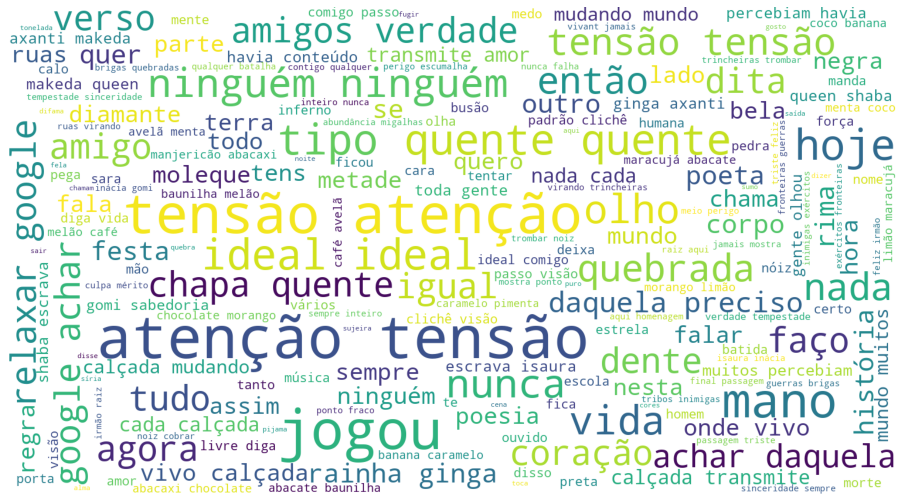

In [246]:
wordCloudAlbum(6)

**AmarElo**


AmarElo


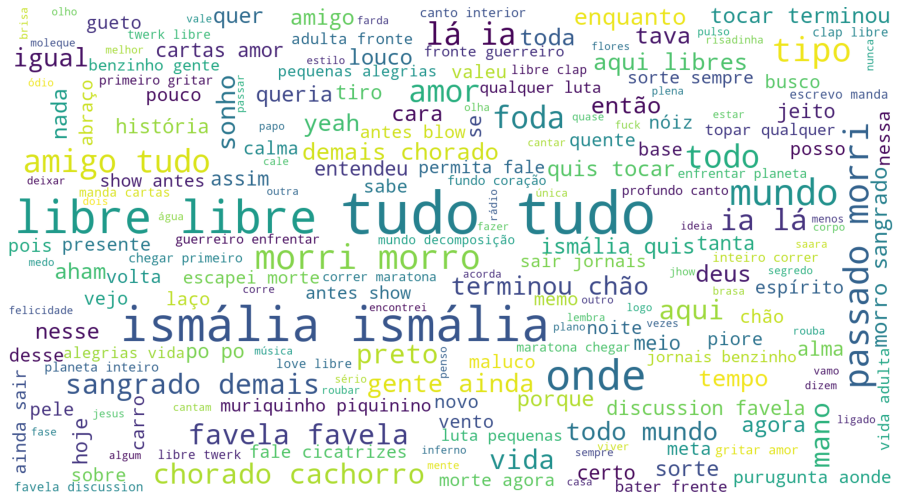

In [247]:
wordCloudAlbum(7)